In [ ]:
#Importing the various pandas and Python Libraries for running the code
import numpy as np
import pandas as pd
import requests as re
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Importing the Graph Visualization Tools
import plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

# Retrieve Data

In [ ]:
ROOT = "https://data.cityofnewyork.us/resource/uip8-fykc.json" # The JSON API USED TO IMPORT THE DATA
LIMIT = 1000000 # 1000000
# URL = f"{ROOT}?$limit={LIMIT}&$where=arrest_date between '{YEAR}-01-01T00:00:00' and '{YEAR}-12-31T00:00:00'"
URL = f"{ROOT}?$limit={LIMIT}"

response = re.get(URL)
# response.text

df = pd.read_json(response.text)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54576 entries, 0 to 54575
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   arrest_key                   54576 non-null  int64  
 1   arrest_date                  54576 non-null  object 
 2   pd_cd                        54325 non-null  float64
 3   pd_desc                      54576 non-null  object 
 4   ky_cd                        54325 non-null  float64
 5   ofns_desc                    54576 non-null  object 
 6   law_code                     54576 non-null  object 
 7   law_cat_cd                   54156 non-null  object 
 8   arrest_boro                  54576 non-null  object 
 9   arrest_precinct              54576 non-null  int64  
 10  jurisdiction_code            54576 non-null  int64  
 11  age_group                    54576 non-null  object 
 12  perp_sex                     54576 non-null  object 
 13  perp_race       

In [ ]:
df.head(10) #Inspecting Data

#Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,263187871,2023-02-07T00:00:00.000,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,...,951637,171141,40.636362,-74.117505,"{'type': 'Point', 'coordinates': [-74.117505, ...",4.0,1.0,13.0,74.0,10697.0
1,261368273,2023-01-04T00:00:00.000,NaN,(null),NaN,(null),RPA0076801,M,M,34,...,1004287,251338,40.856519,-73.927564,"{'type': 'Point', 'coordinates': [-73.927564, ...",47.0,4.0,39.0,22.0,13098.0
2,261667175,2023-01-10T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,...,1008754,238895,40.822355,-73.911463,"{'type': 'Point', 'coordinates': [-73.911463, ...",34.0,5.0,43.0,25.0,10929.0
3,264298625,2023-02-27T00:00:00.000,NaN,(null),NaN,(null),PL 2224000,F,Q,113,...,1039225,181937,40.665881,-73.801837,"{'type': 'Point', 'coordinates': [-73.80183654...",62.0,3.0,46.0,64.0,24339.0
4,261516485,2023-01-07T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,...,988210,218129,40.765390,-73.985702,"{'type': 'Point', 'coordinates': [-73.985702, ...",12.0,4.0,10.0,10.0,12081.0
5,261273897,2023-01-03T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,13,...,989179,205835,40.731646,-73.982214,"{'type': 'Point', 'coordinates': [-73.982214, ...",71.0,4.0,51.0,7.0,11729.0
6,261487453,2023-01-06T00:00:00.000,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,103,...,1042249,193186,40.696739,-73.790838,"{'type': 'Point', 'coordinates': [-73.790838, ...",41.0,3.0,6.0,61.0,24668.0
7,262291240,2023-01-21T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,75,...,1016237,180818,40.662924,-73.884702,"{'type': 'Point', 'coordinates': [-73.884702, ...",45.0,2.0,25.0,47.0,17214.0
8,261927480,2023-01-14T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,67,...,1006227,178986,40.657926,-73.920790,"{'type': 'Point', 'coordinates': [-73.92079, 4...",61.0,2.0,17.0,40.0,17614.0
9,261823038,2023-01-12T00:00:00.000,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,66,...,984981,174446,40.645493,-73.997366,"{'type': 'Point', 'coordinates': [-73.997366, ...",2.0,2.0,7.0,39.0,13515.0


In [ ]:
df.describe()
# The describe() function provides a summary of the distribution and basic statistics of the numerical data,
# allowing you to gain insights into the data's central tendency, spread, and potential outliers.

,arrest_key,pd_cd,ky_cd,arrest_precinct,jurisdiction_code,x_coord_cd,y_coord_cd,latitude,longitude,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
count,5.457600e+04,54325.000000,54325.000000,54576.000000,54576.000000,5.457600e+04,54576.000000,54576.000000,54576.000000,54572.000000,54569.000000,54572.000000,54572.000000,54455.000000
mean,2.635819e+08,430.457174,251.346618,63.581849,0.967147,1.005843e+06,208315.449337,40.737667,-73.920633,37.072326,3.334329,27.456956,39.164700,14505.164980
std,1.401601e+06,277.973670,149.381441,34.536247,7.865097,2.176083e+04,29773.620121,0.192568,0.325643,20.896033,1.225212,14.492720,21.419541,3875.016649
min,2.611809e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.251844,1.000000,1.000000,1.000000,1.000000,10090.000000
25%,2.623376e+08,115.000000,113.000000,40.000000,0.000000,9.916260e+05,186030.250000,40.677230,-73.973423,18.000000,2.000000,13.750000,23.000000,11606.000000
50%,2.635892e+08,397.000000,236.000000,63.000000,0.000000,1.005731e+06,206632.500000,40.733736,-73.922475,41.000000,3.000000,29.000000,38.000000,13095.000000
75%,2.647476e+08,705.000000,344.000000,101.000000,0.000000,1.017750e+06,236537.000000,40.815904,-73.879103,55.000000,4.000000,40.000000,58.000000,17213.000000
max,2.660041e+08,972.000000,995.000000,123.000000,97.000000,1.066940e+06,271819.000000,40.912714,0.000000,71.000000,5.000000,51.000000,77.000000,24672.000000


# Data Clearning

In [ ]:
df.info() # function provides a summary of the DataFrame "df",

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54576 entries, 0 to 54575
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   arrest_key                   54576 non-null  int64  
 1   arrest_date                  54576 non-null  object 
 2   pd_cd                        54325 non-null  float64
 3   pd_desc                      54576 non-null  object 
 4   ky_cd                        54325 non-null  float64
 5   ofns_desc                    54576 non-null  object 
 6   law_code                     54576 non-null  object 
 7   law_cat_cd                   54156 non-null  object 
 8   arrest_boro                  54576 non-null  object 
 9   arrest_precinct              54576 non-null  int64  
 10  jurisdiction_code            54576 non-null  int64  
 11  age_group                    54576 non-null  object 
 12  perp_sex                     54576 non-null  object 
 13  perp_race       

In [ ]:
df.duplicated().sum #calculates the number of duplicate rows in the DataFrame 'df'.

TypeError: ignored

In [ ]:
df.iloc[0, :] #checks one full row to debug the error

arrest_key                                                             263187871
arrest_date                                              2023-02-07T00:00:00.000
pd_cd                                                                      105.0
pd_desc                                                        STRANGULATION 1ST
ky_cd                                                                      106.0
ofns_desc                                                         FELONY ASSAULT
law_code                                                              PL 1211200
law_cat_cd                                                                     F
arrest_boro                                                                    S
arrest_precinct                                                              120
jurisdiction_code                                                              0
age_group                                                                  25-44
perp_sex                    

In [ ]:

df_test = df.drop(columns=['geocoded_column'])#creates a copy of entire dataset df_test where the column geocoded is dropeed however the origingal df is untouched 
df_test.duplicated().sum()# checks for duplicate again

0

In [ ]:
df[df_test.duplicated(keep=False)]
#filters the DataFrame 'df' to show only the rows that are duplicates.

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi


In [ ]:
df.shape

#The shape attribute in pandas is used to retrieve the dimensions of a DataFrame. 
#t returns the size of the DataFrame as a tuple in the format (number of rows, number of columns)

(54576, 24)

In [ ]:
df.isna().sum()
# calculates the number of missing values (NaN or null values) in each column of the DataFrame 'df'.

arrest_key                       0
arrest_date                      0
pd_cd                          251
pd_desc                          0
ky_cd                          251
ofns_desc                        0
law_code                         0
law_cat_cd                     420
arrest_boro                      0
arrest_precinct                  0
jurisdiction_code                0
age_group                        0
perp_sex                         0
perp_race                        0
x_coord_cd                       0
y_coord_cd                       0
latitude                         0
longitude                        0
geocoded_column                  0
:@computed_region_f5dn_yrer      4
:@computed_region_yeji_bk3q      7
:@computed_region_92fq_4b7q      4
:@computed_region_sbqj_enih      4
:@computed_region_efsh_h5xi    121
dtype: int64

In [ ]:
# Drops rows from a DataFrame df that contain any missing values.
df = df.dropna()


In [ ]:
df.isna().sum() #checks to see if missing values rows are dropped

arrest_key                     0
arrest_date                    0
pd_cd                          0
pd_desc                        0
ky_cd                          0
ofns_desc                      0
law_code                       0
law_cat_cd                     0
arrest_boro                    0
arrest_precinct                0
jurisdiction_code              0
age_group                      0
perp_sex                       0
perp_race                      0
x_coord_cd                     0
y_coord_cd                     0
latitude                       0
longitude                      0
geocoded_column                0
:@computed_region_f5dn_yrer    0
:@computed_region_yeji_bk3q    0
:@computed_region_92fq_4b7q    0
:@computed_region_sbqj_enih    0
:@computed_region_efsh_h5xi    0
dtype: int64

In [ ]:
#performs the grouping, counting, sorting,
df_group_1 = df.groupby(["arrest_boro"], as_index=False)["arrest_key"].count()
# df_group_1
df_group_1 = df_group_1.sort_values("arrest_key", ascending=False).reset_index(drop=True)
df_group_1.iloc[:10]

,arrest_boro,arrest_key
0,K,15133
1,B,12691
2,M,12242
3,Q,11390
4,S,2324


In [ ]:
df.columns #to see all columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [ ]:
# Convert to datetime datatype
df["arrest_date"] = pd.to_datetime(df["arrest_date"])


df.head()

<ipython-input-16-f2fc8e1e0f1e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,263187871,2023-02-07,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,...,951637,171141,40.636362,-74.117505,"{'type': 'Point', 'coordinates': [-74.117505, ...",4.0,1.0,13.0,74.0,10697.0
2,261667175,2023-01-10,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,...,1008754,238895,40.822355,-73.911463,"{'type': 'Point', 'coordinates': [-73.911463, ...",34.0,5.0,43.0,25.0,10929.0
4,261516485,2023-01-07,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,...,988210,218129,40.765390,-73.985702,"{'type': 'Point', 'coordinates': [-73.985702, ...",12.0,4.0,10.0,10.0,12081.0
5,261273897,2023-01-03,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,13,...,989179,205835,40.731646,-73.982214,"{'type': 'Point', 'coordinates': [-73.982214, ...",71.0,4.0,51.0,7.0,11729.0
6,261487453,2023-01-06,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,103,...,1042249,193186,40.696739,-73.790838,"{'type': 'Point', 'coordinates': [-73.790838, ...",41.0,3.0,6.0,61.0,24668.0


## Pandas Plot

* `bar` or `barh` for bar plots.
* `hist` for histogram.
* `box` for boxplot.
* `kde` or `density` for density plots.
* `area` for area plots.
* `scatter` for scatter plots.
* `hexbin` for hexagonal bin plots.
* `pie` for pie plots.

In [ ]:
df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [ ]:
px.histogram(df, x="arrest_boro", title="Borough with Highest Arrest")#Checks which boro has the most arrest

In [ ]:
df["arrest_boro"].value_counts() #Gives precision of arrest per Boroughs and orders it

K    15133
B    12691
M    12242
Q    11390
S     2324
Name: arrest_boro, dtype: int64

In [ ]:
#Finds what crime is most frequent in each borough
# Group the data by 'arrest_boro' and 'ofns_desc', and count the occurrences
grouped_data = df.groupby(['arrest_boro', 'ofns_desc']).size().reset_index(name='count')

# Find the most prevalent offense description for each borough
most_prevalent = grouped_data.groupby('arrest_boro').apply(lambda x: x.loc[x['count'].idxmax()]).reset_index(drop=True)

# Create the visualization
fig = px.bar(most_prevalent, x='arrest_boro', y='count', color='ofns_desc', title='Most Prevalent Offense Description by Borough')
fig.show()

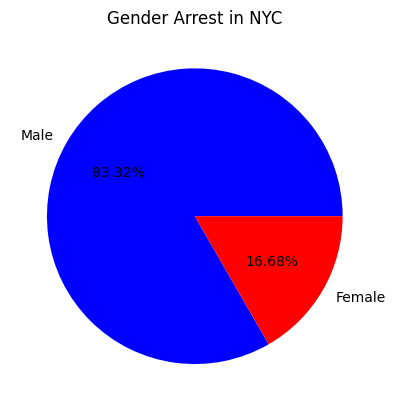

In [ ]:
df.perp_sex.value_counts()

males = (df['perp_sex'] == 'M').sum()
females = (df['perp_sex'] == 'F').sum()

proportions = [males,females]
gender = ['Male', 'Female']

plt.pie(proportions, labels = gender, colors = ['blue', 'red'], autopct = '%.2f%%')

plt.title('Gender Arrest in NYC')

plt.show()

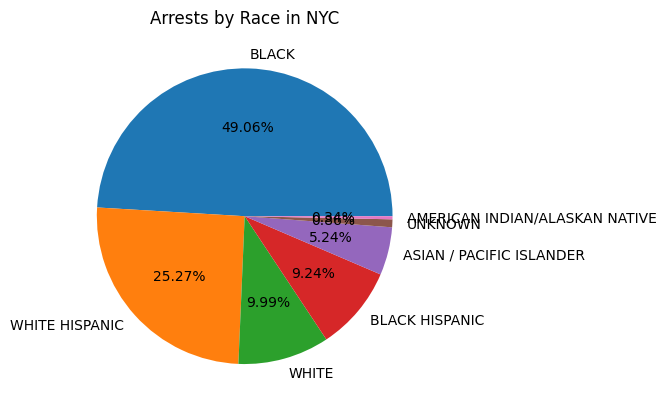

In [ ]:
race_counts = df['perp_race'].value_counts()

proportions = race_counts.values
races = race_counts.index

plt.pie(proportions, labels=races, autopct='%.2f%%')

plt.title('Arrests by Race in NYC')

plt.show()

In [ ]:
grouped_df = df.groupby("age_group", as_index=False)["arrest_precinct"].count()

fig = px.line(grouped_df,
              x="age_group",
              y="arrest_precinct",
              title="Average Arrest Precinct by Age Group")

fig.update_traces(mode="lines+markers") 

fig.update_xaxes(title_text="Age Group")
fig.update_yaxes(title_text="Average Arrest Precinct")

fig.show()

In [ ]:
# Group the data by 'ofns_desc' and 'arrest_boro', and count the occurrences
grouped_data = df.groupby(['ofns_desc', 'arrest_boro']).size().reset_index(name='count')

# Find the place where each offense description occurs the most
most_occurrences = grouped_data.groupby('ofns_desc').apply(lambda x: x.loc[x['count'].idxmax()]).reset_index(drop=True)

# Create the visualization
fig = px.bar(most_occurrences, x='ofns_desc', y='count', color='arrest_boro', title='Crime and Most Occuring Boroughs')
fig.show()

In [ ]:
# Group the data by 'perp_race' and 'ofns_desc', and count the occurrences
grouped_data = df.groupby(['perp_race', 'ofns_desc']).size().reset_index(name='count')

# Create the visualization
fig = px.bar(grouped_data, x='perp_race', y='count', color='ofns_desc', title='Relationship Between Race and Crime')
fig.show()

In [ ]:
import plotly.express as px

# Group the data by 'perp_race' and 'ofns_desc', and count the occurrences
grouped_data = df.groupby(['perp_race', 'ofns_desc']).size().reset_index(name='count')

# Find the most committed offense for each race
most_committed = grouped_data.groupby('perp_race').apply(lambda x: x.loc[x['count'].idxmax()]).reset_index(drop=True)

# Create the visualization
fig = px.bar(most_committed, x='perp_race', y='count', color='ofns_desc', title='Race and Most Committed Crime')
fig.show()


In [ ]:
# Convert 'arrest_date' column to datetime format
df['arrest_date'] = pd.to_datetime(df['arrest_date'])

# Group the data by 'arrest_date' and count the occurrences
grouped_data = df.groupby('arrest_date').size().reset_index(name='count')

# Create the visualization
fig = px.line(grouped_data, x='arrest_date', y='count', title='Crime Trend Over Time')
fig.show()

<ipython-input-24-5b02bc07a7d7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
import plotly.express as px

# Convert 'arrest_date' column to datetime format
df['arrest_date'] = pd.to_datetime(df['arrest_date'])

# Extract the month and year from the 'arrest_date' column
df['month'] = df['arrest_date'].dt.month
df['year'] = df['arrest_date'].dt.year

# Group the data by 'month' and 'year' and count the occurrences
grouped_data = df.groupby(['month', 'year']).size().reset_index(name='count')

# Create a line plot with 'month' on the x-axis, 'count' on the y-axis, and 'year' as color
fig = px.line(grouped_data, x='month', y='count', color='year', title='Seasonal Arrest Pattern')
fig.show()


<ipython-input-23-934ecfc10040>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-934ecfc10040>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-934ecfc10040>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

# Filter out rows with missing latitude and longitude values
filtered_data = df.dropna(subset=['latitude', 'longitude'])

# Create a scatter map plot with latitude and longitude
fig = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude', hover_name='ofns_desc',
                        zoom=9, mapbox_style='carto-positron',center={'lat': 40.7128, 'lon': -74.0060}, 
                       title='Crime Hotspots')

# Set the map style to 'open-street-map'
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Calculating the total number of arrests
total_arrests = df["perp_race"].value_counts().sum()

# Creating a DataFrame with the sum of injuries and fatalities
df['TOTAL ARREST'] = total_arrests

# Plot the heatmap using the filtered DataFrame with the center set to New York City
fig = px.density_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        z='TOTAL ARREST',
                        radius=10,
                        hover_name='geocoded_column',
                        hover_data=['arrest_date', 'arrest_boro'],
                        mapbox_style='carto-positron',
                        zoom=9,
                        center={'lat': 40.7128, 'lon': -74.0060},  # Coordinates for New York City
                        color_continuous_scale=px.colors.sequential.Viridis,
                        title='Arrest Density (Heatmap)')

# Change the height of the map
fig.update_layout(height=800)

fig.show()

Output hidden; open in https://colab.research.google.com to view.